데이터 마운트, 모듈

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
# 확인 필수!!!!
#  드라이브 마운트 후 진행해야 합니다.
DATA_PATH=""

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
#기계학습 모델 생성, 학습, 평가
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score,precision_score,mean_squared_error,mean_absolute_error,r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree # 의사결정나무 규칙 시각화용
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import sklearn.datasets as d
from tqdm import tqdm # 오 이거 신기하다.
# 시각화
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
# 한글폰트 지원

In [ ]:
obe_df = pd.read_csv("")

######################의사결정나무

In [ ]:
obe = pd.read_csv("")

In [ ]:
# 의사결정 나무

In [ ]:
# 의사결정 나무
# Feature와 Target 데이터 설정
#X = obe.drop(columns=['NObeyesdad'])
#y = obe['NObeyesdad']

# 학습 데이터와 테스트 데이터로 분할
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=obe['NObeyesdad']) #,stratify=obe['NObeyesdad'] 하면 정확도 확 떨어짐. 왜인지?

# 데이터 정규화 # 익태님: 스케일링하고 쪼개는 게 굿
# Scaling 스케일링하면 같은 깊이에도 정확도가 좀 올라감 안하면 살짝 떨어지는 것 같음.
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train.values)
#X_test = scaler.transform(X_test.values)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# 의사결정 나무
# Feature와 Target 데이터 설정
X = obe.drop(columns=['NObeyesdad'])
y = obe['NObeyesdad']
# 스케일링
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
original_labeled_Scaled = obe
cont_vars = ['Age', 'Height', 'Weight']
ordinal_vars = ['CAEC_no','CAEC_Sometimes',	'CAEC_Frequently','CAEC_Always', 'CALC_no','CALC_Sometimes','CALC_Frequently','CALC_Always', 'MTRANS_CarBike','MTRANS_Public','MTRANS_BikeWalking','FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
original_labeled_Scaled[cont_vars] = std_scaler.fit_transform(original_labeled_Scaled[cont_vars])
original_labeled_Scaled[ordinal_vars] = mm_scaler.fit_transform(original_labeled_Scaled[ordinal_vars])

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=obe['NObeyesdad']) #,stratify=obe['NObeyesdad'] 하면 정확도 확 떨어짐. 왜인지?
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# 각 데이터 세트의 크기 확인
print("학습 데이터 크기:", X_train.shape)
print("검증 데이터 크기:", X_val.shape)
print("테스트 데이터 크기:", X_test.shape)

학습 데이터 크기: (1350, 24)
검증 데이터 크기: (338, 24)
테스트 데이터 크기: (423, 24)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 의사결정나무 모델 정의
dt_classifier = DecisionTreeClassifier()

# 그리드 서치를 위한 하이퍼파라미터 그리드 정의
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30],  # 최대 깊이
    'min_samples_split': [2, 5, 10, 15, 20]  # 노드를 분할하기 위한 최소한의 샘플 수
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)

# 데이터에 대해 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'max_depth': 20, 'min_samples_split': 2}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# 예측 결과 및 학습 상태 체크
obe_clf = DecisionTreeClassifier(max_depth=15, min_samples_split=2)

# 학습 데이터를 사용하여 모델을 학습
obe_clf.fit(X_train, y_train)

# 학습된 모델을 사용하여 validation 데이터에 대한 예측을 수행
val_predictions = obe_clf.predict(X_val)

# validation 데이터에 대한 예측 결과를 평가

# 정확도 계산
val_accuracy = accuracy_score(val_predictions,y_val)

# 정밀도 계산
val_precision = precision_score(y_val, val_predictions,average='macro')

# 재현율 계산
val_recall = recall_score(y_val, val_predictions, average='macro')

# F1 점수 계산
val_f1 = f1_score(y_val, val_predictions, average='macro')

# 결과 출력
print("Validation 데이터에 대한 정확도:", accuracy_score(y_val, val_predictions))
print("Validation 데이터에 대한 정밀도:", val_precision)
print("Validation 데이터에 대한 재현율:", val_recall)
print("Validation 데이터에 대한 F1 점수:", val_f1)

Validation 데이터에 대한 정확도: 0.9260355029585798
Validation 데이터에 대한 정밀도: 0.9265891912320484
Validation 데이터에 대한 재현율: 0.9251230136323304
Validation 데이터에 대한 F1 점수: 0.9252479327393056


In [ ]:
# 학습이 완료된 dt_clf를 이용하여 테스트 데이터로 예측 수행
pred = obe_clf.predict(X_test)
pred

array([0, 1, 6, 4, 3, 2, 3, 1, 3, 5, 0, 1, 4, 5, 1, 5, 1, 2, 6, 1, 1, 4,
       3, 5, 6, 5, 2, 4, 6, 2, 3, 2, 5, 5, 4, 1, 4, 0, 5, 0, 6, 0, 4, 4,
       6, 4, 0, 6, 3, 2, 4, 0, 5, 2, 6, 1, 4, 4, 4, 3, 6, 6, 0, 6, 5, 2,
       3, 0, 3, 3, 4, 5, 0, 0, 2, 0, 0, 0, 2, 2, 1, 6, 4, 3, 1, 5, 4, 5,
       6, 6, 3, 6, 2, 3, 5, 6, 0, 1, 4, 3, 3, 3, 3, 5, 6, 4, 2, 2, 6, 3,
       6, 1, 5, 4, 5, 4, 0, 4, 1, 1, 4, 6, 4, 0, 2, 3, 6, 6, 5, 3, 4, 6,
       0, 0, 0, 5, 2, 1, 4, 0, 5, 2, 5, 2, 2, 3, 6, 3, 1, 5, 5, 4, 4, 0,
       4, 2, 4, 1, 5, 6, 1, 3, 2, 3, 4, 6, 5, 6, 6, 4, 5, 1, 1, 2, 3, 5,
       3, 5, 1, 6, 3, 3, 2, 3, 0, 0, 1, 4, 2, 6, 5, 6, 4, 5, 1, 3, 6, 1,
       4, 2, 4, 4, 6, 6, 1, 0, 2, 5, 5, 4, 0, 4, 1, 6, 6, 6, 5, 2, 1, 6,
       1, 4, 2, 2, 1, 5, 3, 4, 3, 5, 6, 0, 2, 4, 6, 6, 1, 1, 3, 5, 4, 1,
       4, 2, 1, 5, 1, 0, 2, 4, 6, 1, 4, 6, 3, 4, 3, 4, 6, 3, 4, 2, 1, 2,
       5, 2, 6, 4, 5, 2, 2, 0, 4, 5, 6, 4, 3, 0, 4, 5, 2, 4, 6, 1, 1, 5,
       2, 6, 3, 4, 5, 1, 0, 1, 2, 0, 5, 5, 6, 1, 6,

In [ ]:
print("예측 정확도 : {0:.4f}".format(accuracy_score(y_test, pred))) # 정규화,최대최소를 하니까 정확도가 올라갔음. 하기 전 89, 한 후 90

예측 정확도 : 0.9173


In [ ]:
# 측정기
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(pred, y_test)
precision = precision_score(y_test, pred, average='macro')
recall = recall_score(y_test, pred, average='macro')
f1 = f1_score(y_test, pred, average='macro')

print("정확도 : {}".format(accuracy))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

print("Validation 데이터에 대한 정확도:", accuracy_score(y_val, val_predictions))
print("Validation 데이터에 대한 정밀도:", val_precision)
print("Validation 데이터에 대한 재현율:", val_recall)
print("Validation 데이터에 대한 F1 점수:", val_f1)

train_pred = obe_clf.predict(X_train)
train_f1 = f1_score(y_train, train_pred, average='macro')
print("Train 데이터에 대한 F1 점수:", train_f1)

정확도 : 0.91725768321513
정밀도 : 0.9197929097041101
재현율 : 0.9134497595088729
F1 : 0.9151932075002959
Validation 데이터에 대한 정확도: 0.9260355029585798
Validation 데이터에 대한 정밀도: 0.9265891912320484
Validation 데이터에 대한 재현율: 0.9251230136323304
Validation 데이터에 대한 F1 점수: 0.9252479327393056
Train 데이터에 대한 F1 점수: 1.0


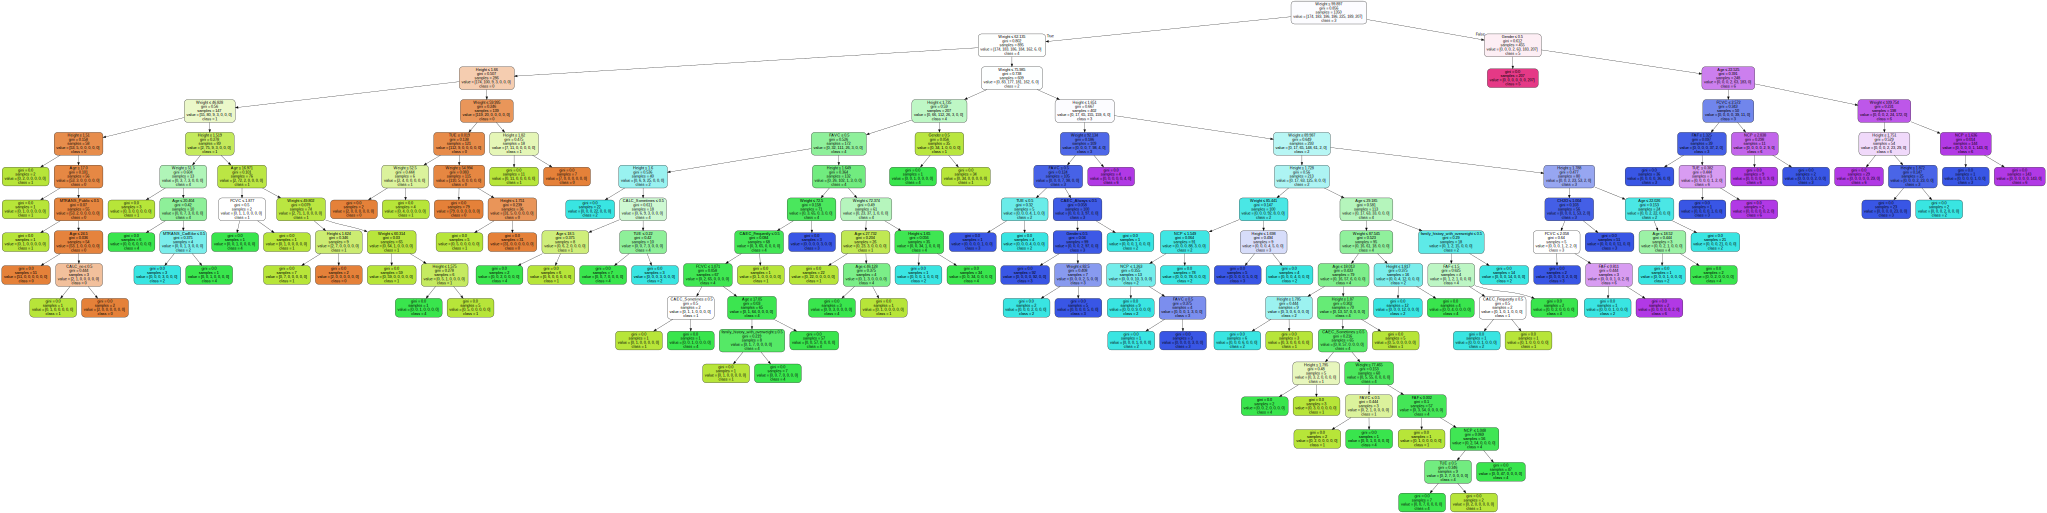

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# 특성 이름을 문자열로 변환
feature_names = [str(feature) for feature in X_train.columns]

# 의사결정나무 시각화
dot_data = export_graphviz(obe_clf, out_file=None,
                           feature_names=feature_names,
                           class_names=[str(label) for label in y_train.unique()],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)

# 시각화 결과 출력
graph


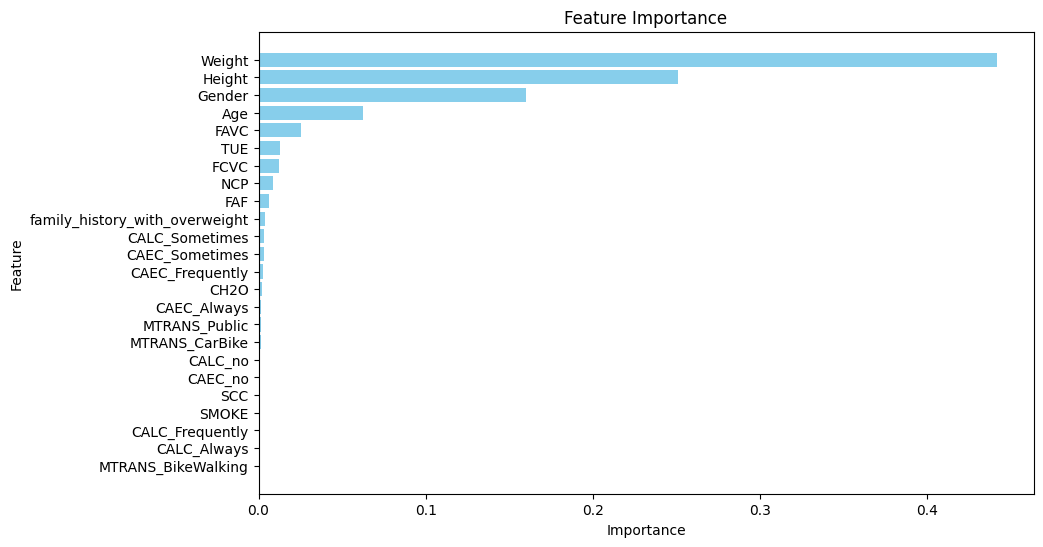

In [ ]:
# 모델에서 특성 중요도 추출
importances = obe_clf.feature_importances_

# 특성 이름 가져오기
feature_names = X.columns

# 특성 중요도를 데이터프레임으로 만들기
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# 특성 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()
